In [2]:
import requests
import pandas as pd
def load_data():
    url = 'http://43.202.66.118:8077/all'
    r = requests.get(url)
    d = r.json()
    return d

data = load_data()
df = pd.DataFrame(data)

In [3]:
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29
303,307,1.jpeg,1,/home/ubuntu/images/n23/dca4fbdd-76c1-4a26-94e...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:58:29
304,308,1.jpeg,1,/home/ubuntu/images/n23/321d7bb3-fb3f-4392-a74...,2024-09-25 16:56:42,n23,n04,1,2024-09-25 16:59:14


In [4]:
df['request_time']

0      2024-09-25 10:30:38
1      2024-09-25 10:30:39
2      2024-09-25 10:30:39
3      2024-09-25 10:30:39
4      2024-09-25 10:30:39
              ...         
301    2024-09-25 16:56:41
302    2024-09-25 16:56:41
303    2024-09-25 16:56:41
304    2024-09-25 16:56:42
305    2024-09-27 14:40:25
Name: request_time, Length: 306, dtype: object

In [5]:
import datetime as dt
df['request_time'] = pd.to_datetime(df['request_time'])
df['request_time']=df['request_time'].dt.strftime('%Y-%m-%d %H')

In [6]:
# TODO
# request_time, prediction_time 이용해 '%Y-%m-%d %H' 형식
# 즉 시간별 GROUPBY COUNT 하여 plt 차트 그려보기
df['prediction_time'] = pd.to_datetime(df['prediction_time'])
df['prediction_time']=df['prediction_time'].dt.strftime('%Y-%m-%d %H')

/home/hahahellooo/.pyenv/versions/3.11.9/envs/note/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hahahellooo/.pyenv/versions/3.11.9/envs/note/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hahahellooo/.pyenv/versions/3.11.9/envs/note/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hahahellooo/.pyenv/versions/3.11.9/envs/note/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hahahellooo/.pyenv/versions/3.11.9/env

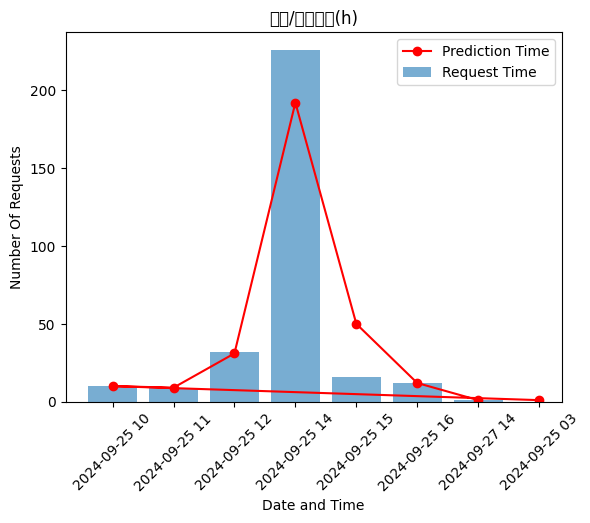

In [7]:
#import matplotlib.pyplot as plt
#cnt_rt=df.groupby(df['request_time']).count()
#cnt_pt=df.groupby(df['prediction_time']).count()

#plt.bar(cnt_rt.index, cnt_rt, label='Request Time', alpha=0.6)
#plt.bar(cnt_pt.index, cnt_pt, label='Prediction Time', alpha=0.6)

# 그래프 설정
#plt.xlabel('Time')
#plt.ylabel('Count')
#plt.title('Request Time vs Prediction Time')
#plt.xticks(rotation=45)  # X축 레이블 회전 (너무 길 경우)
#plt.legend()

# 그래프 출력
#plt.show()

import matplotlib.pyplot as plt

# Grouping 데이터를 .size()로 수정하여 그룹별 데이터 크기 계산
cnt_rt = df.groupby(df['request_time']).size()
cnt_pt = df.groupby(df['prediction_time']).size()

# 막대 그래프: 요청 시간별 건수
plt.bar(cnt_rt.index, cnt_rt, label='Request Time', alpha=0.6) # alpha 투명도 조절

# 선 그래프: 예측 시간별 건수
plt.plot(cnt_pt.index, cnt_pt, 'ro-', label='Prediction Time') # r 선의 색상, o 포인트 마커모양

# 그래프 설정
plt.title('요청/처리건수(h)')
plt.xlabel('Date and Time')
plt.ylabel('Number Of Requests')
plt.xticks(rotation=45)  # X축 레이블 회전 (텍스트가 길 경우)
plt.legend()

# 그래프 출력
plt.show()


In [8]:
import matplotlib.pyplot as plt
df['request_time'] = pd.to_datetime(df['request_time'])
df['request_time']=df['request_time'].dt.strftime('%Y-%m-%d %H')
# Grouping 데이터를 .size()로 수정하여 그룹별 데이터 크기 계산
df1 = df.groupby(df['request_time']).size()
df1.index

Index(['2024-09-25 10', '2024-09-25 11', '2024-09-25 12', '2024-09-25 14',
       '2024-09-25 15', '2024-09-25 16', '2024-09-27 14'],
      dtype='object', name='request_time')

/tmp/ipykernel_16580/381873503.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/home/hahahellooo/.pyenv/versions/3.11.9/envs/note/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hahahellooo/.pyenv/versions/3.11.9/envs/note/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hahahellooo/.pyenv/versions/3.11.9/envs/note/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hahahellooo/.pyenv/versions/3.11.9/envs/note/lib/pytho

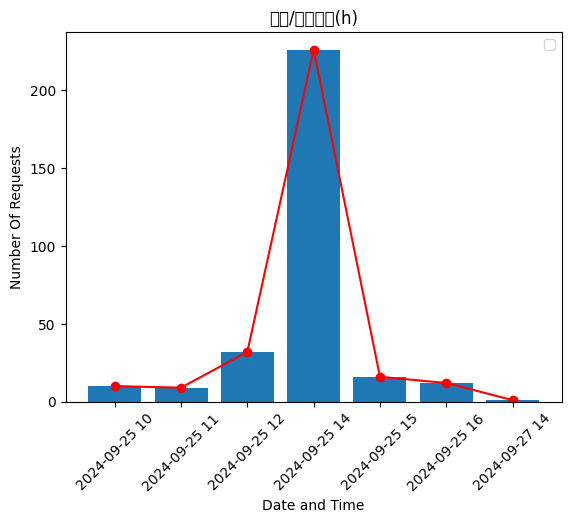

In [9]:
plt.bar(df1.index, df1)
plt.plot(df1.index, df1, 'ro-')
plt.title('요청/처리건수(h)')
plt.xlabel('Date and Time')
plt.ylabel('Number Of Requests')
plt.xticks(rotation=45)  # X축 레이블 회전 (텍스트가 길 경우)
plt.legend()

# 그래프 출력
plt.show()

In [10]:
#  요청자, 처리자간의 통계 / 불균형(누가 처리에 문제가 있는지 확인) VIEW 추가
import datetime as dt
df2 = df.groupby(df['request_user']).size()
df2

request_user
n01      7
n03      4
n04      6
n05      9
n06      9
n07      7
n08      6
n11      9
n13      5
n16     12
n18      4
n21     11
n22      1
n23     12
n77    204
dtype: int64

In [11]:
idx = df[df['prediction_model'] != '^n[0-9][0-9]$'].index
idx
df = df.sort_values(by='prediction_model', ascending=False)

In [12]:
import pandas as pd

# predicotn_model이 n00 형식인 것만 필터링
df3 = df[df['prediction_model'].str.match('^n[0-9][0-9]$')]
df3
df3 = df.groupby(df3['prediction_model']).size()
df3


prediction_model
n01     4
n04    42
n06     1
n07     3
n13    11
n15    15
n21     8
n22     1
n23     6
n77    30
dtype: int64

In [13]:
df['prediction_model']
df4 = df.groupby(df['prediction_model']).size()


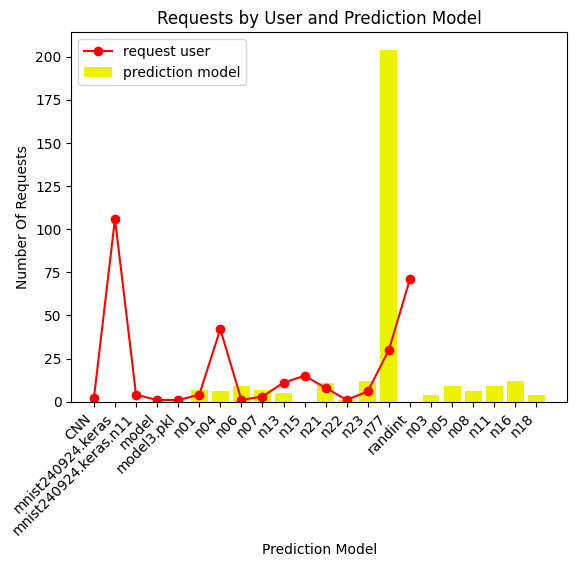

In [14]:
df2 = df.groupby(df['request_user']).size()
df4 = df.groupby(df['prediction_model']).size()
df2_sorted = df2.sort_index(ascending=True)
df4_sorted = df4.sort_index(ascending=True)
plt.plot(df4_sorted.index, df4_sorted, 'ro-', label = 'request user')
plt.bar(df2_sorted.index, df2_sorted, color='#ebf301', label = 'prediction model')
plt.title('Requests by User and Prediction Model')
plt.xlabel('Prediction Model')
plt.ylabel('Number Of Requests')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전 (텍스트가 길 경우) # ha = 'right' 레이블이 오른쪽정렬
plt.legend()

# 그래프 출력

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (22,) and arg 1 with shape (15,).

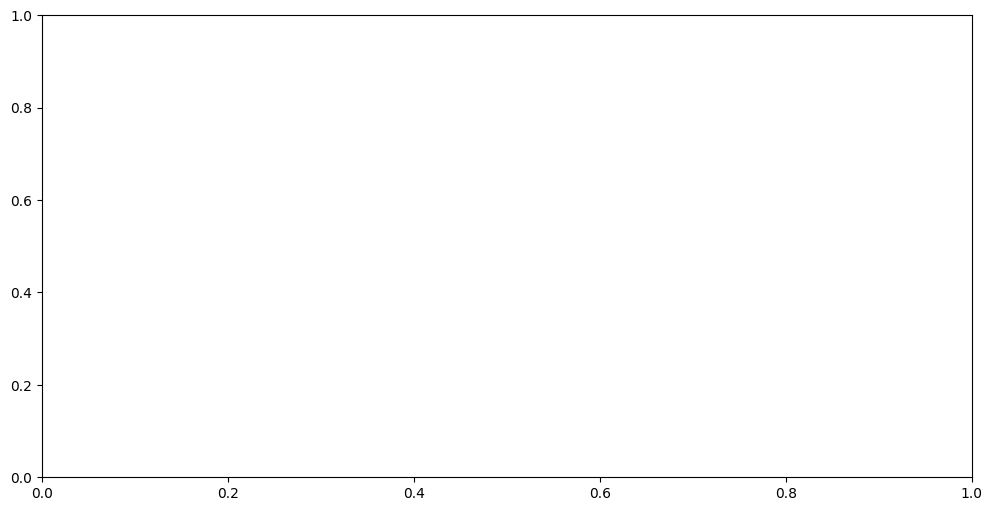

In [21]:
import numpy as np
df2['request_user'] = df.groupby(df['request_user']).size()
df4['prediction_model'] = df.groupby(df['prediction_model']).size()
fig, ax = plt.subplots(figsize=(12,6))
bar_width=0.25

index = np.arange(22)
b1 = plt.bar(index, df2['request_user'], bar_width, alpha=0.8, color='#ebf301',label = 'prediction model')
b2= plt.bar(index+bar_width, df4['prediction_model'],bar_width, alpha=0.8, color='blue' , label = 'request user')

plt.title('Requests by User and Prediction Model')
plt.xlabel('Prediction Model')
plt.ylabel('Number Of Requests')
#plt.xticks(np.arange(bar_width, 22+bar_width,1), )  # X축 레이블 회전 (텍스트가 길 경우) # ha = 'right' 레이블이 오른쪽정렬
plt.legend()
plt.show()
# 그래프 출력



In [18]:
df4

prediction_model
CNN                                                                      2
mnist240924.keras                                                      106
mnist240924.keras.n11                                                    4
model                                                                    1
model3.pkl                                                               1
n01                                                                      4
n04                                                                     42
n06                                                                      1
n07                                                                      3
n13                                                                     11
n15                                                                     15
n21                                                                      8
n22                                                                      1
n23     

In [ ]:
df3_sorted = df3.sort_index(ascending=True)
plt.plot(df3_sorted.index, df3_sorted, 'ro-', label = 'prediction model')
plt.bar(df2_sorted.index, df2_sorted, color='#ebf301', label = 'request user')
plt.title('Requests by User and Prediction Model')
plt.xlabel('Request User and Prediction Model')
plt.ylabel('Number Of Requests')
plt.xticks(rotation=45)  # X축 레이블 회전 (텍스트가 길 경우)
plt.legend()

# 그래프 출력
plt.show()